# Logistic Regression!

And some further practice with the metrics we use to evaluate classification problems.

In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import category_encoders as ce

from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('titanic.csv', index_col = "PassengerId")

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Model-less Baseline

First of all, I want to see how well the model will do if it predicts the majority class. In other words, if the model only predicts that no one survives, what percentage of the time would it be right? We can then compare our accuracy scores from our models to see if we're improving upon this 'model-less' baseline score.

How do we do this? Find the number of passengers who didn't survive, divide by the total number of passengers.

In [6]:
num_passengers = len(df['Survived'])

In [7]:
num_passenger_didnotsurvive = len(df.loc[df['Survived'] == 0])

In [8]:
num_passenger_didnotsurvive / num_passengers
# Result: 61% is our initial baseline

0.6161616161616161

In [9]:
# Another way to do this - the mean of this column gives the percentage of
# passengers who DID survive because it's a 0/1 binary - find the inverse
1 - df['Survived'].mean()

0.6161616161616161

### Logistic Regression
To model this data, I'm going to first prepare the columns I want to use by following the strategy described [here](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html).

In [10]:
# I'll be using two types of columns - numeric and categorical
num_cols = ['Age', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']

In [11]:
# Defining my target and my overall columns
target = 'Survived'
used_cols = num_cols + cat_cols

In [12]:
# Defining my X and y
X = df[used_cols]
y = df[target]

# And then doing a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# I'll be using separate strategies for the two types of columns
# For numeric columns, I'll be imputing nulls and scaling
num_imputer = SimpleImputer(strategy='median')
scaler = RobustScaler()

# For categorical columns, I'll be imputing nulls through the encoding
encoder = ce.TargetEncoder(cols=cat_cols, handle_missing="value")

In [14]:
# Creating the separate transformers for numeric and categorical columns
num_transformer = make_pipeline(num_imputer, scaler)
cat_transformer = make_pipeline(encoder)
# Defining my preprocessor, which combines the two transformers
preprocessor = ColumnTransformer(
    transformers=[('num', num_transformer, num_cols),
                  ('cat', cat_transformer, cat_cols)])

In [15]:
# Instantiating my model and pipeline
model = LogisticRegression()
pipe = make_pipeline(preprocessor, model)

In [16]:
# Now, fitting our pipeline and grabbing our training and testing predictions
pipe.fit(X_train, y_train)

train_preds = pipe.predict(X_train)
test_preds = pipe.predict(X_test)

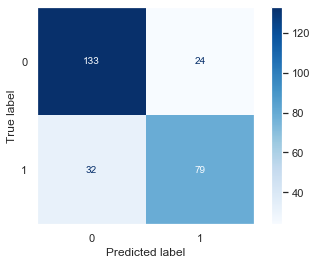

In [17]:
# Plotting the confusion matrix using SKLearn
plot_confusion_matrix(pipe, X_test, y_test,
                      cmap=plt.cm.Blues, # Changing the color scheme
                      values_format=".3g") # Formatting the numbers properly
plt.grid(False) # This just removes an annoying grid that shows up by default

plt.show()

### Confusion Matrix Interpretation

Before we even look at the scores we get back from this model, let's look at the confusion matrix first.

![Confusion Matrix Interpreted, from https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html](confusionmatrixinterpretation.jpg)

Note! The above image has Positive first, then Negative - but SKLearn printed our confusion matrix with Negative first, then Positive.

Now - 

- Calculate the Precision score:

- Calculate the Recall score, also known as the Sensitivity: 

There's another score that's often referenced which balances precision and recall - it's called an [**F1 Score**](https://en.wikipedia.org/wiki/F1_score).

$$ \text{F1 Score} = 2 * \frac{ precision * recall}{precision + recall} $$

- Calculate the F1 score:

**Let's Discuss**: Why might we care more about precision than recall, or vice versa?

- 


----

Moving on - luckily SKLearn will of course calculate these scores for us. You can see all of their classification metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

Let's look at our accuracy scores:

In [18]:
# Printing the metrics nicely
print("Accuracy:"); print("="*len("Accuracy:"))
print(f"TRAIN: {accuracy_score(y_train, train_preds)}")
print(f"TEST: {accuracy_score(y_test, test_preds)}")

print("\nBalanced Accuracy:"); print("="*len("Balanced Accuracy:"))
print(f"TRAIN: {balanced_accuracy_score(y_train, train_preds)}")
print(f"TEST: {balanced_accuracy_score(y_test, test_preds)}")

Accuracy:
TRAIN: 0.7913322632423756
TEST: 0.7910447761194029

Balanced Accuracy:
TRAIN: 0.7692872603586889
TEST: 0.7794227348367475


### Evaluation:

So, how'd we do? Specifically, how'd we do compared to our model-less baseline?

- 


Why is the balanced accuracy lower than the default accuracy?

- 


### Next Steps

What can we potentially do to improve this model?

- 


## Further Practice

This time, with a wine quality dataset!

Found here: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data

Note: the target is where the quality, given in the original data, is greater than or equal to 7. The original 'quality' column has been removed and replaced by this new target, where a 1 can be interpreted to mean that the wine is of great quality.

In [19]:
wine_df = pd.read_csv("winequality-red-withtarget.csv")

In [20]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [21]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [22]:
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
target                  0
dtype: int64

Now it's your turn! Now what?